# IV vs RV Earnings NVDA

Durante los periodos pre-earnings los precios de los contratos de opciones (primas) tienden a "inflarse", debido a un aumento en IV, ligado a la incertidumbre que acarrea este tipo de anuncios en el corto plazo. A pesar de un aumento en la IV, es decir, del potencial movimiento esperado por el mercado, en la mayoria de las veces, los anuncios de earnings luego de darse a conocer, no terminan generando el impacto en el subyacente que el mercado tenia previsto. 

En este artículo analizaremos el IV de contratos de opciones ATM que expiren en la semana del anuncio, el objetivo, es comparar con la volatilidad realizada posterior a los anuncos de earnings (cierre de hoy - apertura de mañana). Utilizaremos NVDA durante 2022, ya que, es una de las pocas empresas que logré encontrar información gratuita de sus contratos de opciones.

Aquí te dejo la página en donde encontré la info de los contratos de opciones: https://www.optionsdx.com/shop/

In [20]:
# importando paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si

#### 1. OBTENIENDO DATA

Primero obtendremos los datos del subyacente (NVDA), precios de cierre, apertura y esas cosas...

In [21]:
subya = si.get_data('NVDA', start_date='01/01/2022', end_date='01/04/2023').reset_index()
subya.rename(columns={'index': 'fecha'}, inplace=True)

# obtener lo que será la volatilidad realizada de mañana en la apertura respecto al cierre de hoy
subya['RV t+1'] = (subya['open'].shift(-1)-subya['adjclose'])/subya['adjclose']
subya = subya.iloc[:, [0, 8]] # solo fecha y realized volatility de apertura mañana respecto al cierre hoy nos interesa
subya

,fecha,RV t+1
0,2022-01-03,0.006477
1,2022-01-04,-0.010366
2,2022-01-05,0.002597
3,2022-01-06,-0.000024
4,2022-01-07,-0.023183
...,...,...
247,2022-12-27,-0.013388
248,2022-12-28,0.026441
249,2022-12-29,-0.018072
250,2022-12-30,0.016579


Desde la página o link antes mencionado podemos descargar información de la cadena de opciones en el cierre del día, el único inconveniente es que se descargan como archivos txt divididos por mes. Ante esto, habrá que unir los archivos txt.

In [22]:
txt1 = pd.read_csv('nvda_eod_202201.txt', delimiter=',')  
txt2 = pd.read_csv('nvda_eod_202202.txt', delimiter=',')
txt3 = pd.read_csv('nvda_eod_202203.txt', delimiter=',')
txt4 = pd.read_csv('nvda_eod_202204.txt', delimiter=',')  
txt5 = pd.read_csv('nvda_eod_202205.txt', delimiter=',')
txt6 = pd.read_csv('nvda_eod_202206.txt', delimiter=',')
txt7 = pd.read_csv('nvda_eod_202207.txt', delimiter=',')  
txt8 = pd.read_csv('nvda_eod_202208.txt', delimiter=',')
txt9 = pd.read_csv('nvda_eod_202209.txt', delimiter=',')
txt10 = pd.read_csv('nvda_eod_202210.txt', delimiter=',')  
txt11 = pd.read_csv('nvda_eod_202211.txt', delimiter=',')
txt12 = pd.read_csv('nvda_eod_202212.txt', delimiter=',')

# concatenar archivos txt y guardar como 1 solo archivo csv
concat = pd.concat([txt1, txt2, txt3, txt4, txt5, txt6, txt7, txt8, txt9, txt10, txt11, txt12])
concat.to_csv('nvda_option_chain_2022.csv', index=False)

# guardar archivo csv creado como una variable
optChain = pd.read_csv('nvda_option_chain_2022.csv')
optChain

C:\Users\espin\AppData\Local\Temp\ipykernel_18956\695310524.py:1: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  txt1 = pd.read_csv('nvda_eod_202201.txt', delimiter=',')
C:\Users\espin\AppData\Local\Temp\ipykernel_18956\695310524.py:2: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  txt2 = pd.read_csv('nvda_eod_202202.txt', delimiter=',')
C:\Users\espin\AppData\Local\Temp\ipykernel_18956\695310524.py:4: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  txt4 = pd.read_csv('nvda_eod_202204.txt', delimiter=',')
C:\Users\espin\AppData\Local\Temp\ipykernel_18956\695310524.py:5: DtypeWarning: Columns (15,17,18,20,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  txt5 = pd.read_csv('nvda_eod_202205.txt', delimiter=',')
C:\Users\espin\AppData\Local\Temp\ip

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,1641243600,2022-01-03 16:00,2022-01-03,16.0,301.22,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00049,0.00001,0.00005,-0.00443,0.00000,1.677500,0.000000,141.2,0.469
1,1641243600,2022-01-03 16:00,2022-01-03,16.0,301.22,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.020000,-0.00078,0.00001,0.00088,-0.00448,-0.00004,1.524300,0.000000,131.2,0.436
2,1641243600,2022-01-03 16:00,2022-01-03,16.0,301.22,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00024,0.00002,0.00124,-0.00844,-0.00011,1.533240,0.000000,126.2,0.419
3,1641243600,2022-01-03 16:00,2022-01-03,16.0,301.22,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00049,0.00001,0.00087,-0.00850,-0.00050,1.461900,15.000000,121.2,0.402
4,1641243600,2022-01-03 16:00,2022-01-03,16.0,301.22,2022-01-07,1641589200,4.0,1.00000,0.00000,...,0.010000,-0.00106,0.00001,0.00062,-0.00837,0.00000,1.386690,7.000000,116.2,0.386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350141,1672434000,2022-12-30 16:00,2022-12-30,16.0,146.13,2025-01-17,1737147600,749.0,0.24171,0.00312,...,0.000000,-0.77962,0.00379,0.40381,-0.00880,-1.00035,0.538650,,173.9,1.190
350142,1672434000,2022-12-30 16:00,2022-12-30,16.0,146.13,2025-01-17,1737147600,749.0,0.23750,0.00302,...,0.000000,-0.77247,0.00363,0.41135,-0.00956,-1.02792,0.551160,,178.9,1.224
350143,1672434000,2022-12-30 16:00,2022-12-30,16.0,146.13,2025-01-17,1737147600,749.0,0.22973,0.00303,...,0.000000,-0.75394,0.00350,0.43839,-0.01093,-1.11982,0.572760,,183.9,1.258
350144,1672434000,2022-12-30 16:00,2022-12-30,16.0,146.13,2025-01-17,1737147600,749.0,0.22237,0.00296,...,0.000000,-0.75746,0.00343,0.42616,-0.01071,-1.07928,0.575740,,188.9,1.292


#### 2. FILTRADO Y LIMPIEZA (optChain)

Lo anterior nos entrega la principal información de una cadena de opciónes (griegas, DTE, strikes, etc.), pero para nuestro caso solo necesitaremos algunas columnas: fecha, DTE (nos ayudará a filtrar contratos más próximos a expirar), delta e IV de calls y puts (delta nos ayudará a seleccionar contratos ATM).

In [23]:
optChain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350146 entries, 0 to 350145
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   [QUOTE_UNIXTIME]        350146 non-null  int64  
 1    [QUOTE_READTIME]       350146 non-null  object 
 2    [QUOTE_DATE]           350146 non-null  object 
 3    [QUOTE_TIME_HOURS]     350146 non-null  float64
 4    [UNDERLYING_LAST]      350146 non-null  float64
 5    [EXPIRE_DATE]          350146 non-null  object 
 6    [EXPIRE_UNIX]          350146 non-null  int64  
 7    [DTE]                  350146 non-null  float64
 8    [C_DELTA]              350146 non-null  float64
 9    [C_GAMMA]              350146 non-null  float64
 10   [C_VEGA]               350146 non-null  float64
 11   [C_THETA]              350146 non-null  float64
 12   [C_RHO]                350146 non-null  float64
 13   [C_IV]                 350146 non-null  object 
 14   [C_VOLUME]         

In [24]:
optChain = optChain.iloc[:, [2, 7, 8, 13, 24, 29]]

# filtrando por DTE igual o menor a 4 (contratos que expiran durante la semana)
optChain = optChain[(optChain[' [DTE]'] <= 4)]

Tranformaremos el Dtype de columnas que lo necesitan para flexibilizar futuros cálculos.

In [25]:
optChain[' [QUOTE_DATE]'] = pd.to_datetime(optChain[' [QUOTE_DATE]'])

optChain[' [C_IV]'] = pd.to_numeric(optChain[' [C_IV]'], errors='coerce')
optChain[' [P_IV]'] = pd.to_numeric(optChain[' [P_IV]'], errors='coerce')

optChain[' [C_IV]'] = optChain[' [C_IV]'].astype(float)
optChain[' [P_IV]'] = optChain[' [P_IV]'].astype(float)

In [26]:
optChain = optChain.dropna()
optChain

,[QUOTE_DATE],[DTE],[C_DELTA],[C_IV],[P_DELTA],[P_IV]
21,2022-01-03,4.0,0.93673,0.63441,-0.02293,0.53063
23,2022-01-03,4.0,0.94529,0.48939,-0.04008,0.50923
24,2022-01-03,4.0,0.94077,0.47331,-0.05100,0.49809
25,2022-01-03,4.0,0.93790,0.44334,-0.06584,0.48744
26,2022-01-03,4.0,0.92326,0.44016,-0.08838,0.48344
...,...,...,...,...,...,...
348992,2022-12-30,0.0,0.94783,0.39908,-0.00839,0.27007
348993,2022-12-30,0.0,0.93635,0.32022,-0.01062,0.21172
348994,2022-12-30,0.0,0.90220,0.25710,-0.01414,0.15165
348995,2022-12-30,0.0,0.82409,0.18989,-0.02291,0.08787


In [27]:
optChain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14853 entries, 21 to 348996
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0    [QUOTE_DATE]  14853 non-null  datetime64[ns]
 1    [DTE]         14853 non-null  float64       
 2    [C_DELTA]     14853 non-null  float64       
 3    [C_IV]        14853 non-null  float64       
 4    [P_DELTA]     14853 non-null  float64       
 5    [P_IV]        14853 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 812.3 KB


Ahora vamos a filtrar nuestro dataframe optChain (recordar que solo posee contratos próximos a expirar, o DTE menor o igual a 4), la idea es quedarnos solo con la información de contratos ATM (delta más cercano a 0.5 en caso de calls y -0.5 en caso de puts) de cada día. La metodología que no me complico la existencia fue dividiendo optChain en 2: calls y puts, y filtrar por separado, para luego volver a unir con pd.merge(). 

Cualquier comentario con un código más eficiente será más que bienvenido. En los nuevos flitros por calls y puts no consideraremos la columna DTE, debido a que ya cumplio su deber.

In [28]:
# calls
optChainC = optChain.iloc[:, [0, 2, 3]]
idx_min_abs_diff_calls = optChainC.groupby(' [QUOTE_DATE]')[' [C_DELTA]'].apply(lambda x: (x-0.5).abs().idxmin()) # valor más ATM
optChainC = optChainC.loc[idx_min_abs_diff_calls]

# puts
optChainP = optChain.iloc[:, [0, 4, 5]]
idx_min_abs_diff_puts = optChainP.groupby(' [QUOTE_DATE]')[' [P_DELTA]'].apply(lambda x: (x+0.5).abs().idxmin()) # valor más ATM
optChainP = optChainP.loc[idx_min_abs_diff_puts]

# unir 
optChainFilt = pd.merge(optChainC, optChainP, on=' [QUOTE_DATE]', how='outer')
optChainFilt

,[QUOTE_DATE],[C_DELTA],[C_IV],[P_DELTA],[P_IV]
0,2022-01-03,0.47637,0.44955,-0.52251,0.46123
1,2022-01-04,0.52610,0.47401,-0.47369,0.47629
2,2022-01-05,0.46394,0.55238,-0.53550,0.54914
3,2022-01-06,0.47714,0.43950,-0.52482,0.41700
4,2022-01-07,0.34733,0.07882,-0.99838,0.00254
...,...,...,...,...,...
249,2022-12-26,0.48911,0.55379,-0.51372,0.51531
250,2022-12-27,0.47498,0.55595,-0.47450,0.56507
251,2022-12-28,0.47145,0.50627,-0.53003,0.49311
252,2022-12-29,0.49690,0.40819,-0.50477,0.39533


#### 3. UNIR DATAFRAMES (optChainFilt & subya)

In [29]:
# unir optChain con subya por fecha
df = pd.merge(subya, optChainFilt, left_on='fecha', right_on=' [QUOTE_DATE]', how='outer').dropna()
df

,fecha,RV t+1,[QUOTE_DATE],[C_DELTA],[C_IV],[P_DELTA],[P_IV]
0,2022-01-03,0.006477,2022-01-03,0.47637,0.44955,-0.52251,0.46123
1,2022-01-04,-0.010366,2022-01-04,0.52610,0.47401,-0.47369,0.47629
2,2022-01-05,0.002597,2022-01-05,0.46394,0.55238,-0.53550,0.54914
3,2022-01-06,-0.000024,2022-01-06,0.47714,0.43950,-0.52482,0.41700
4,2022-01-07,-0.023183,2022-01-07,0.34733,0.07882,-0.99838,0.00254
...,...,...,...,...,...,...,...
246,2022-12-23,-0.008328,2022-12-23,0.04786,0.03650,-0.67447,0.13639
247,2022-12-27,-0.013388,2022-12-27,0.47498,0.55595,-0.47450,0.56507
248,2022-12-28,0.026441,2022-12-28,0.47145,0.50627,-0.53003,0.49311
249,2022-12-29,-0.018072,2022-12-29,0.49690,0.40819,-0.50477,0.39533


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 250
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha          246 non-null    datetime64[ns]
 1   RV t+1         246 non-null    float64       
 2    [QUOTE_DATE]  246 non-null    datetime64[ns]
 3    [C_DELTA]     246 non-null    float64       
 4    [C_IV]        246 non-null    float64       
 5    [P_DELTA]     246 non-null    float64       
 6    [P_IV]        246 non-null    float64       
dtypes: datetime64[ns](2), float64(5)
memory usage: 15.4 KB


In [31]:
# solo nos interesa fecha, RV t+1 e IV de calls y puts
df = df.iloc[:, [0, 1, 4, 6]]
df

,fecha,RV t+1,[C_IV],[P_IV]
0,2022-01-03,0.006477,0.44955,0.46123
1,2022-01-04,-0.010366,0.47401,0.47629
2,2022-01-05,0.002597,0.55238,0.54914
3,2022-01-06,-0.000024,0.43950,0.41700
4,2022-01-07,-0.023183,0.07882,0.00254
...,...,...,...,...
246,2022-12-23,-0.008328,0.03650,0.13639
247,2022-12-27,-0.013388,0.55595,0.56507
248,2022-12-28,0.026441,0.50627,0.49311
249,2022-12-29,-0.018072,0.40819,0.39533


#### 4. IV PRE-EARNINGS v/s GAP APERTURA DE MAÑANA

In [32]:
# en las siguientes fechas NVDA presento earnings durante 2022
fechasEarnings = ['2022-02-16', '2022-05-25', '2022-08-24', '2022-11-16']

# filtrando solo por fechas de earnings
dfEarnings = df[df['fecha'].isin(fechasEarnings)]

print(dfEarnings)

         fecha    RV t+1   [C_IV]   [P_IV]
31  2022-02-16 -0.031983  1.30588  1.27337
99  2022-05-25 -0.054258  1.54188  1.50437
161 2022-08-24 -0.021060  0.94476  0.89771
220 2022-11-16 -0.011652  1.18885  1.22982


#### 5. VISUALIZACIÓN

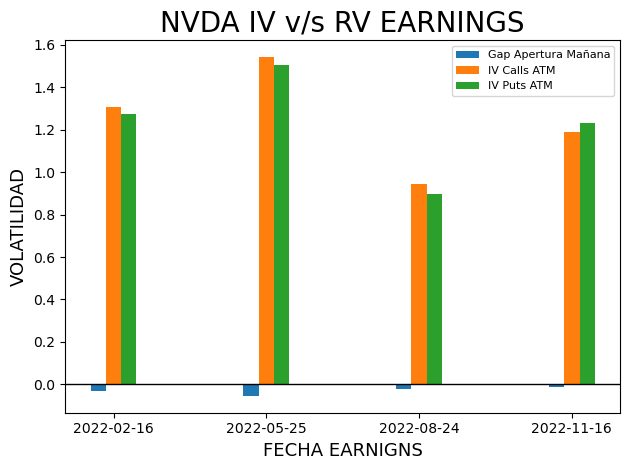

In [42]:
fig, ax = plt.subplots()

# graficar las barras
bar_width = 0.1

# secuencia de números que se utilizarán como coordenadas en el eje x para posicionar las barras en el gráfico.
x = range(len(dfEarnings))

ax.bar(x, dfEarnings['RV t+1'], width=bar_width, align='center', label='Gap Apertura Mañana')
ax.bar([a + bar_width for a in x], dfEarnings[' [C_IV]'], width=bar_width, align='center', label='IV Calls ATM')
ax.bar([a + 2 * bar_width for a in x], dfEarnings[' [P_IV]'], width=bar_width, align='center', label='IV Puts ATM')

# Configuración de los ejes
ax.set_xticks([a + bar_width for a in x])
ax.set_xticklabels(dfEarnings['fecha'].dt.strftime('%Y-%m-%d'))
ax.set_xlabel('FECHA EARNIGNS', fontsize=13)
ax.set_ylabel('VOLATILIDAD', fontsize=13)

ax.axhline(y=0, color='black', linewidth=1)

# Agregar leyenda
ax.legend(fontsize=8)

plt.title('NVDA IV v/s RV EARNINGS', fontsize=20)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Con el gráfico de barras se logra dimensionar la enorme diferencia entre lo que el mercado esperaba en el cierre de la sessión durante los earnings de NVDA del año 2022 frente a como abrío el mercado al día siguiente. Por ejemplo, para el último earnings del año 2022, los contratos puts ATM que expiraban en la semana del anuncio mantenian un IV de 123%, sin embargo, al siguiente día el mercado abrío solo un 1.2% a la baja. 

Este tipo de situaciones se da constantemente durante los anuncios de resultados de la empresas.